In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import mlrose_hiive
import matplotlib.pyplot as plt

In [2]:
# Make the figures bigger
plt.rcParams.update({'font.size': 20})

In [3]:
np.random.seed(42)
# Set starting length as 100
problem = mlrose_hiive.FlipFlopOpt(length=100)

In [4]:
# Define helper functions
def fitness_mean(df):
    df['Fitness_1'] = df['Fitness_1'].fillna(method='ffill')
    df['Fitness_2'] = df['Fitness_2'].fillna(method='ffill')
    df['Fitness_3'] = df['Fitness_3'].fillna(method='ffill')
    df['Fitness_4'] = df['Fitness_4'].fillna(method='ffill')
    df['Fitness_5'] = df['Fitness_5'].fillna(method='ffill')
    df['Mean'] = df.loc[:, ["Fitness_1","Fitness_2","Fitness_3","Fitness_4","Fitness_5"]].mean(axis = 1)
    #df['Iterations'] = (df.index +1)
    df['Iterations'] = df.loc[:, ["Iteration_1","Iteration_2","Iteration_3","Iteration_4","Iteration_5"]].mean(axis = 1)
    return df

def time_mean(df):
    df['Fitness_1'] = df['Fitness_1'].fillna(method='ffill')
    df['Fitness_2'] = df['Fitness_2'].fillna(method='ffill')
    df['Fitness_3'] = df['Fitness_3'].fillna(method='ffill')
    df['Fitness_4'] = df['Fitness_4'].fillna(method='ffill')
    df['Fitness_5'] = df['Fitness_5'].fillna(method='ffill')
    df['Mean'] = df.loc[:, ["Fitness_1","Fitness_2","Fitness_3","Fitness_4","Fitness_5"]].mean(axis = 1)
    
    df['Time_1'] = df['Time_1'].fillna(method='ffill')
    df['Time_2'] = df['Time_2'].fillna(method='ffill')
    df['Time_3'] = df['Time_3'].fillna(method='ffill')
    df['Time_4'] = df['Time_4'].fillna(method='ffill')
    df['Time_5'] = df['Time_5'].fillna(method='ffill')
    df['Mean_Time'] = df.loc[:, ["Time_1","Time_2","Time_3","Time_4","Time_5"]].mean(axis = 1)
    
    return df

def feval_mean(df):
    df['FEvals_1'] = df['FEvals_1'].fillna(method='ffill')
    df['FEvals_2'] = df['FEvals_2'].fillna(method='ffill')
    df['FEvals_3'] = df['FEvals_3'].fillna(method='ffill')
    df['FEvals_4'] = df['FEvals_4'].fillna(method='ffill')
    df['FEvals_5'] = df['FEvals_5'].fillna(method='ffill')
    df['Mean_Evals'] = df.loc[:, ["FEvals_1","FEvals_2","FEvals_3","FEvals_4","FEvals_5"]].mean(axis = 1)
    
    df['Fitness_1'] = df['Fitness_1'].fillna(method='ffill')
    df['Fitness_2'] = df['Fitness_2'].fillna(method='ffill')
    df['Fitness_3'] = df['Fitness_3'].fillna(method='ffill')
    df['Fitness_4'] = df['Fitness_4'].fillna(method='ffill')
    df['Fitness_5'] = df['Fitness_5'].fillna(method='ffill')
    df['Mean'] = df.loc[:, ["Fitness_1","Fitness_2","Fitness_3","Fitness_4","Fitness_5"]].mean(axis = 1)
    
    return df

def plot_fitness(df,title):
    plt.plot(df.Iteration_1, df.Fitness_1, lw=2, color='r', marker='.', markersize=2,label ='Individual')
    plt.plot(df.Iteration_2, df.Fitness_2, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.Iteration_3, df.Fitness_3, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.Iteration_4, df.Fitness_4, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.Iteration_5, df.Fitness_5, lw=2, color='r', marker='.', markersize=2)

    plt.plot(df.Iterations, df.Mean, lw=2, color='b', marker='.', markersize=2, label ='Avg')
    plt.xlabel("Iterations [n]",fontsize = 16)
    plt.ylabel("Fitness Score",fontsize = 16)
    plt.legend(loc="best",prop={'size': 14})
    plt.title('Iterations vs Fitness - '+ title,fontsize = 16)
    plt.show()

def plot_time(df,title):
    plt.plot(df.Time_1, df.Fitness_1, lw=2, color='r', marker='.', markersize=2,label ='Individual')
    plt.plot(df.Time_2, df.Fitness_2, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.Time_3, df.Fitness_3, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.Time_4, df.Fitness_4, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.Time_5, df.Fitness_5, lw=2, color='r', marker='.', markersize=2)

    plt.plot(df.Mean_Time, df.Mean, lw=2, color='b', marker='.', markersize=2, label ='Avg')
    plt.xlabel("Clock Time [s]",fontsize = 16)
    plt.ylabel("Fitness Score",fontsize = 16)
    plt.legend(loc="best",prop={'size': 14})
    plt.title('Time vs Fitness - ' + str(title),fontsize = 16)
    plt.show()
    
def plot_fevals(df,title):
    plt.plot(df.FEvals_1, df.Fitness_1, lw=2, color='r', marker='.', markersize=2,label ='Individual')
    plt.plot(df.FEvals_2, df.Fitness_2, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.FEvals_3, df.Fitness_3, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.FEvals_4, df.Fitness_4, lw=2, color='r', marker='.', markersize=2)
    plt.plot(df.FEvals_5, df.Fitness_5, lw=2, color='r', marker='.', markersize=2)

    plt.plot(df.Mean_Evals, df.Mean, lw=2, color='b', marker='.', markersize=2, label ='Avg')
    plt.xlabel("FEvals",fontsize = 16)
    plt.ylabel("Fitness Score",fontsize = 16)
    plt.legend(loc="best",prop={'size': 14})
    plt.title('FEvals vs Fitness - '+ str(title),fontsize = 16)
    plt.tight_layout()
    plt.show()
    
     
    plt.tight_layout()

## RHC

In [5]:
%%time
best_curve_reduced_fitness_total = pd.DataFrame([])
best_curve_reduced_time_total = pd.DataFrame([])
best_curve_reduced_feval_total= pd.DataFrame([])

# Need to get the average due to stochastic nature of algorithms
for i in range(5):
    print('Current Iteration :'+str(i+1))
    rhc_runner = mlrose_hiive.RHCRunner(
        problem,
        experiment_name="RHC_Exp", 
        iteration_list=[1000000],
        seed=(i+1)*i,
        max_attempts=100, 
        restart_list=[5],
        maximize =True
        )
    
    rhc_run_stats, rhc_run_curves = rhc_runner.run()
    
    best_index_in_curve = rhc_run_curves.Fitness.idxmax()
    best_value = rhc_run_curves.iloc[best_index_in_curve].current_restart
    best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_value, :]
    best_curve = best_curve.reset_index(drop=True)

    best_curve['FEvals'] = best_curve['FEvals']- (best_curve['FEvals'].loc[0]-1)

    best_curve = best_curve.rename(columns ={
        "Fitness" : 'Fitness_'+str(i+1),
        "Time" : 'Time_'+str(i+1),
        "FEvals" : 'FEvals_'+str(i+1),
        "Iteration" : "Iteration_"+str(i+1)
    })


    best_curve_reduced_fitness = best_curve[['Iteration_'+str(i+1),'Fitness_'+str(i+1)]]
    best_curve_reduced_time = best_curve[['Fitness_'+str(i+1),'Time_'+str(i+1)]]
    best_curve_reduced_feval = best_curve[['Fitness_'+str(i+1),'FEvals_'+str(i+1)]]


    best_curve_reduced_fitness = best_curve_reduced_fitness.reset_index(drop = True)
    best_curve_reduced_time = best_curve_reduced_time.reset_index(drop = True)
    best_curve_reduced_feval = best_curve_reduced_feval.reset_index(drop = True)

    best_curve_reduced_fitness_total = pd.concat([best_curve_reduced_fitness,best_curve_reduced_fitness_total],axis = 1)
    best_curve_reduced_time_total = pd.concat([best_curve_reduced_time,best_curve_reduced_time_total],axis = 1)
    best_curve_reduced_feval_total = pd.concat([best_curve_reduced_feval,best_curve_reduced_feval_total],axis = 1)

Current Iteration :1
Current Iteration :2
Current Iteration :3
Current Iteration :4
Current Iteration :5
Wall time: 5.76 s


In [6]:
best_curve_reduced_fitness_total_rhc = fitness_mean(best_curve_reduced_fitness_total)
best_curve_reduced_time_total_rhc = time_mean(best_curve_reduced_time_total)
best_curve_reduced_feval_total_rhc = feval_mean(best_curve_reduced_feval_total)

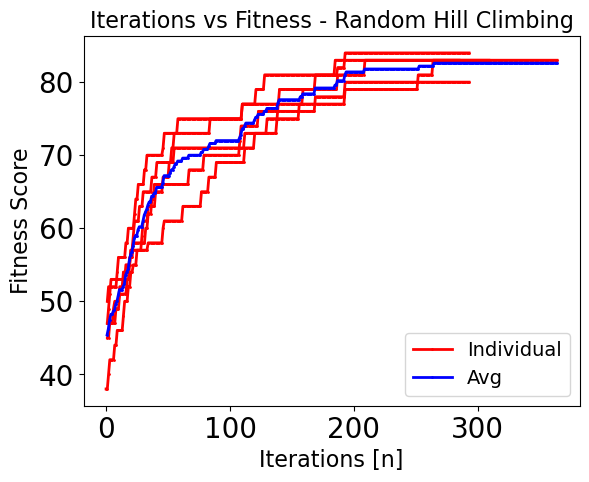

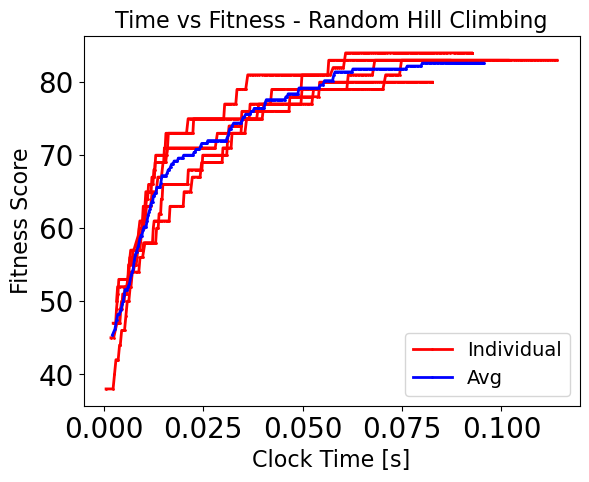

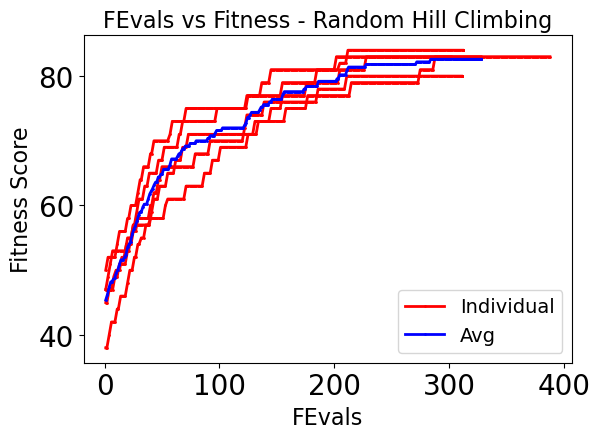

<Figure size 640x480 with 0 Axes>

In [7]:
plot_fitness(best_curve_reduced_fitness_total_rhc,'Random Hill Climbing')
plot_time(best_curve_reduced_time_total_rhc,'Random Hill Climbing')
plot_fevals(best_curve_reduced_feval_total_rhc,'Random Hill Climbing')

## SA - HPO

In [8]:
%%time
hpo_sa_df = pd.DataFrame([])
# We need to do some HPO to find the best temperature value for SA
for i in range(5):
    print('Current Iteration :'+str(i+1))
    sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                               iteration_list=[100000],
                               temperature_list=[1,50,100,250,300],
                               decay_list=[
                                    mlrose_hiive.GeomDecay,
                                    mlrose_hiive.ExpDecay
                                          ],
                               seed=(i+1)*i
                               , max_attempts=100)

    sa_run_stats, sa_run_curves = sa.run()   
    best_curve = sa_run_curves.loc[sa_run_curves.Fitness.idxmax()]
    best_stats = sa_run_stats[(sa_run_stats['Fitness']==best_curve['Fitness'])]
    hpo_sa_df = pd.concat([hpo_sa_df,best_stats])

Current Iteration :1
Current Iteration :2
Current Iteration :3
Current Iteration :4
Current Iteration :5
Wall time: 16min 24s


In [9]:
sa_init_temp = hpo_sa_df['schedule_init_temp'].mode()[0]
sa_schedule_type = hpo_sa_df['schedule_type'].mode()[0]
if sa_schedule_type =='exponential':
    sa_schedule_list = mlrose_hiive.ExpDecay
else:
    sa_schedule_list = mlrose_hiive.GeomDecay
sa_schedule_list

mlrose_hiive.algorithms.decay.exp_decay.ExpDecay

In [28]:
sa_init_temp

1

## SA

In [10]:
best_curve_reduced_fitness_total = pd.DataFrame([])
best_curve_reduced_time_total = pd.DataFrame([])
best_curve_reduced_feval_total= pd.DataFrame([])

# Need to get the average due to stochastic nature of algorithms
for i in range(5):
    print('Current Iteration :'+str(i+1))
    sa_runner = mlrose_hiive.SARunner(
        problem,
        experiment_name="SA_Exp", 
        iteration_list=[100000],
        seed=(i+1)*i,
        max_attempts=100, 
        temperature_list=[sa_init_temp],
        decay_list= [sa_schedule_list],
        maximize =True
        )
    
    sa_run_stats, sa_run_curves = sa_runner.run()
    
    best_curve = sa_run_curves.reset_index(drop=True)

    best_curve['FEvals'] = best_curve['FEvals']- (best_curve['FEvals'].loc[0]-1)

    best_curve = best_curve.rename(columns ={
        "Fitness" : 'Fitness_'+str(i+1),
        "Time" : 'Time_'+str(i+1),
        "FEvals" : 'FEvals_'+str(i+1),
        "Iteration" : "Iteration_"+str(i+1)
    })


    best_curve_reduced_fitness = best_curve[['Iteration_'+str(i+1),'Fitness_'+str(i+1)]]
    best_curve_reduced_time = best_curve[['Fitness_'+str(i+1),'Time_'+str(i+1)]]
    best_curve_reduced_feval = best_curve[['Fitness_'+str(i+1),'FEvals_'+str(i+1)]]


    best_curve_reduced_fitness = best_curve_reduced_fitness.reset_index(drop = True)
    best_curve_reduced_time = best_curve_reduced_time.reset_index(drop = True)
    best_curve_reduced_feval = best_curve_reduced_feval.reset_index(drop = True)

    best_curve_reduced_fitness_total = pd.concat([best_curve_reduced_fitness,best_curve_reduced_fitness_total],axis = 1)
    best_curve_reduced_time_total = pd.concat([best_curve_reduced_time,best_curve_reduced_time_total],axis = 1)
    best_curve_reduced_feval_total = pd.concat([best_curve_reduced_feval,best_curve_reduced_feval_total],axis = 1)

Current Iteration :1
Current Iteration :2
Current Iteration :3
Current Iteration :4
Current Iteration :5


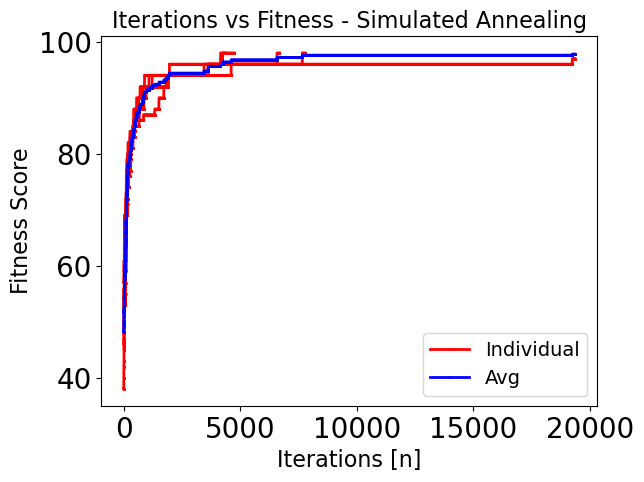

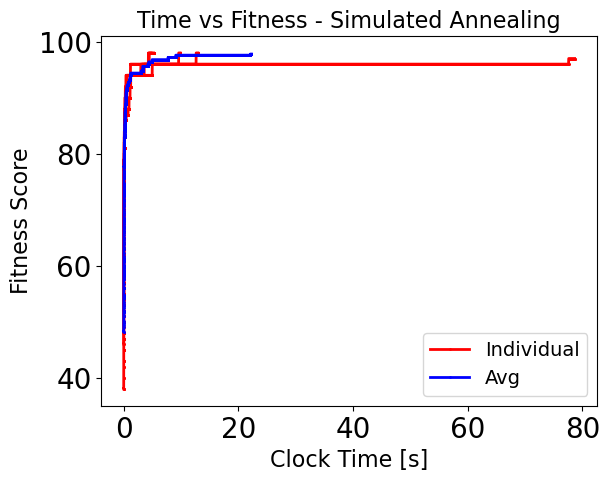

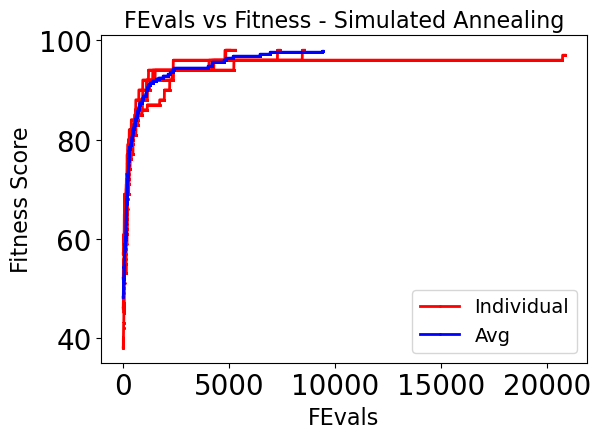

<Figure size 640x480 with 0 Axes>

In [11]:
best_curve_reduced_fitness_total_sa = fitness_mean(best_curve_reduced_fitness_total)
best_curve_reduced_time_total_sa = time_mean(best_curve_reduced_time_total)
best_curve_reduced_feval_total_sa = feval_mean(best_curve_reduced_feval_total)

plot_fitness(best_curve_reduced_fitness_total_sa,'Simulated Annealing')
plot_time(best_curve_reduced_time_total_sa,'Simulated Annealing')
plot_fevals(best_curve_reduced_feval_total_sa,'Simulated Annealing')

## GA HPO

In [12]:
%%time 
hpo_ga_df = pd.DataFrame([])
for i in range(5):
    print('Current Iteration :'+str(i+1))
    ga = mlrose_hiive.GARunner(problem=problem,
                              experiment_name="GA_Exp",
                              seed=(i+1)*i,
                              iteration_list=[10000000],
                              max_attempts=100,
                              population_sizes=[20,50,100,300],
                              mutation_rates=[0.1, 0.25, 0.5, 0.8],
                              maximize = True)
    ga_run_stats, ga_run_curves = ga.run()  
    best_curve = ga_run_curves.loc[ga_run_curves.Fitness.idxmax()]
    best_stats = ga_run_stats[(ga_run_stats['Fitness']==best_curve['Fitness'])]
    hpo_ga_df = pd.concat([hpo_ga_df,best_stats])

Current Iteration :1
Current Iteration :2
Current Iteration :3
Current Iteration :4
Current Iteration :5
Wall time: 54.2 s


In [13]:
ga_mutation_rate = hpo_ga_df['Mutation Rate'].mode()[0]
print(ga_mutation_rate)
ga_population = hpo_ga_df['Population Size'].mode()[0]
print(ga_population)

0.8
300


## GA

In [14]:
best_curve_reduced_fitness_total = pd.DataFrame([])
best_curve_reduced_time_total = pd.DataFrame([])
best_curve_reduced_feval_total= pd.DataFrame([])

# Need to get the average due to stochastic nature of algorithms
for i in range(5):
    print('Current Iteration :'+str(i+1))
    ga_runner = mlrose_hiive.GARunner(
        problem,
        experiment_name="GA_Exp", 
        iteration_list=[100000],
        seed=(i+1)*i,
        max_attempts=100, 
        population_sizes=[int(ga_population)],
        mutation_rates=[ga_mutation_rate],
        maximize =True
        )
    
    ga_run_stats, ga_run_curves = ga_runner.run()
    
    best_curve = ga_run_curves.reset_index(drop=True)

    best_curve['FEvals'] = best_curve['FEvals']- (best_curve['FEvals'].loc[0]-1)

    best_curve = best_curve.rename(columns ={
        "Fitness" : 'Fitness_'+str(i+1),
        "Time" : 'Time_'+str(i+1),
        "FEvals" : 'FEvals_'+str(i+1),
        "Iteration" : "Iteration_"+str(i+1)
    })


    best_curve_reduced_fitness = best_curve[['Iteration_'+str(i+1),'Fitness_'+str(i+1)]]
    best_curve_reduced_time = best_curve[['Fitness_'+str(i+1),'Time_'+str(i+1)]]
    best_curve_reduced_feval = best_curve[['Fitness_'+str(i+1),'FEvals_'+str(i+1)]]


    best_curve_reduced_fitness = best_curve_reduced_fitness.reset_index(drop = True)
    best_curve_reduced_time = best_curve_reduced_time.reset_index(drop = True)
    best_curve_reduced_feval = best_curve_reduced_feval.reset_index(drop = True)

    best_curve_reduced_fitness_total = pd.concat([best_curve_reduced_fitness,best_curve_reduced_fitness_total],axis = 1)
    best_curve_reduced_time_total = pd.concat([best_curve_reduced_time,best_curve_reduced_time_total],axis = 1)
    best_curve_reduced_feval_total = pd.concat([best_curve_reduced_feval,best_curve_reduced_feval_total],axis = 1)

Current Iteration :1
Current Iteration :2
Current Iteration :3
Current Iteration :4
Current Iteration :5


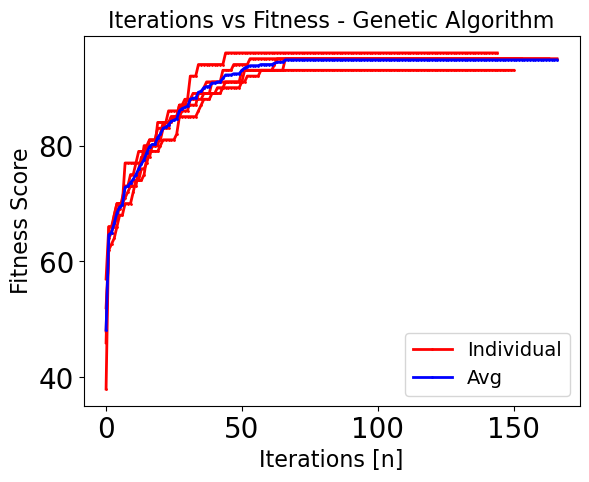

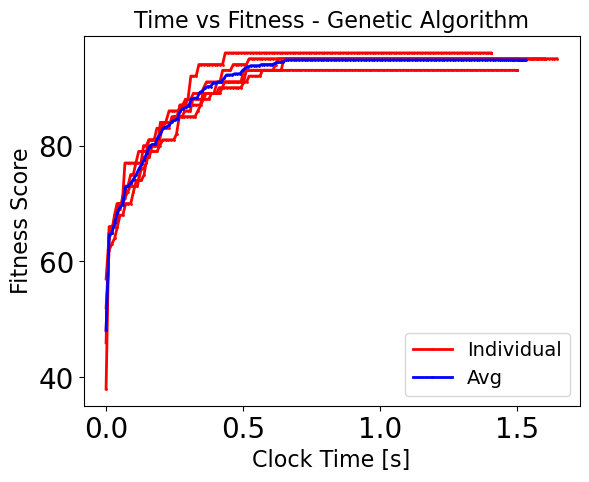

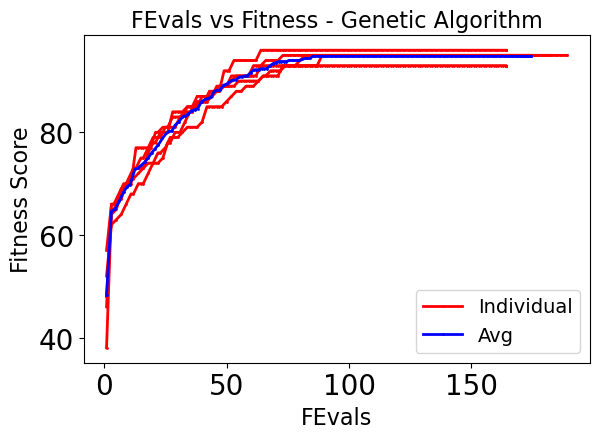

<Figure size 640x480 with 0 Axes>

In [15]:
best_curve_reduced_fitness_total_ga = fitness_mean(best_curve_reduced_fitness_total)
best_curve_reduced_time_total_ga = time_mean(best_curve_reduced_time_total)
best_curve_reduced_feval_total_ga = feval_mean(best_curve_reduced_feval_total)

plot_fitness(best_curve_reduced_fitness_total_ga,'Genetic Algorithm')
plot_time(best_curve_reduced_time_total_ga,'Genetic Algorithm')
plot_fevals(best_curve_reduced_feval_total_ga,'Genetic Algorithm')

## Mimic HPO

In [16]:
%%time
hpo_mmc_df = pd.DataFrame([])
for i in range(5):
    print('Current Iteration :'+str(i+1))
    mmc = mlrose_hiive.MIMICRunner(problem=problem,
                              experiment_name="MMC_Exp",
                              seed=(i+1)*i,
                              iteration_list=[100000],
                              max_attempts=100,
                              population_sizes=[20,50,100,120,140],
                              keep_percent_list=[0.25, 0.5, 0.75],
                              use_fast_mimic=True)

    mmc_run_stats, mmc_run_curves = mmc.run()
    best_curve = mmc_run_curves.loc[mmc_run_curves.Fitness.idxmax()]
    best_stats = mmc_run_curves[(mmc_run_curves['Fitness']==best_curve['Fitness'])]
    hpo_mmc_df = pd.concat([hpo_mmc_df,best_stats])

Current Iteration :1
Current Iteration :2
Current Iteration :3
Current Iteration :4
Current Iteration :5
Wall time: 4min 53s


In [17]:
mmc_pop_size = hpo_mmc_df['Population Size'].mode()[0]
print(mmc_pop_size)
mmc_keep_percent = hpo_mmc_df['Keep Percent'].mode()[0]
print(mmc_keep_percent)

140
0.5


## Mimic

In [18]:
%%time
best_curve_reduced_fitness_total_mmc = pd.DataFrame([])
best_curve_reduced_time_total_mmc = pd.DataFrame([])
best_curve_reduced_feval_total_mmc = pd.DataFrame([])

# Need to get the average due to stochastic nature of algorithms
for i in range(5):
    print('Current Iteration :'+str(i+1))
    mmc_runner = mlrose_hiive.MIMICRunner(
        problem,
        experiment_name="MMC_Exp", 
        iteration_list=[100000],
        seed=(i+1)*i,
        max_attempts=100, 
        population_sizes=[int(mmc_pop_size)],
        keep_percent_list=[mmc_keep_percent],
        maximize =True,
        use_fast_mimic=True
        )
    
    mmc_run_stats, mmc_run_curves = mmc_runner.run()
    
    best_curve = mmc_run_curves.reset_index(drop=True)

    best_curve['FEvals'] = best_curve['FEvals']- (best_curve['FEvals'].loc[0]-1)

    best_curve = best_curve.rename(columns ={
        "Fitness" : 'Fitness_'+str(i+1),
        "Time" : 'Time_'+str(i+1),
        "FEvals" : 'FEvals_'+str(i+1),
        "Iteration" : "Iteration_"+str(i+1)
    })


    best_curve_reduced_fitness = best_curve[['Iteration_'+str(i+1),'Fitness_'+str(i+1)]]
    best_curve_reduced_time = best_curve[['Fitness_'+str(i+1),'Time_'+str(i+1)]]
    best_curve_reduced_feval = best_curve[['Fitness_'+str(i+1),'FEvals_'+str(i+1)]]


    best_curve_reduced_fitness = best_curve_reduced_fitness.reset_index(drop = True)
    best_curve_reduced_time = best_curve_reduced_time.reset_index(drop = True)
    best_curve_reduced_feval = best_curve_reduced_feval.reset_index(drop = True)

    best_curve_reduced_fitness_total_mmc = pd.concat([best_curve_reduced_fitness,best_curve_reduced_fitness_total_mmc],axis = 1)
    best_curve_reduced_time_total_mmc = pd.concat([best_curve_reduced_time,best_curve_reduced_time_total_mmc],axis = 1)
    best_curve_reduced_feval_total_mmc = pd.concat([best_curve_reduced_feval,best_curve_reduced_feval_total_mmc],axis = 1)

Current Iteration :1
Current Iteration :2
Current Iteration :3
Current Iteration :4
Current Iteration :5
Wall time: 36 s


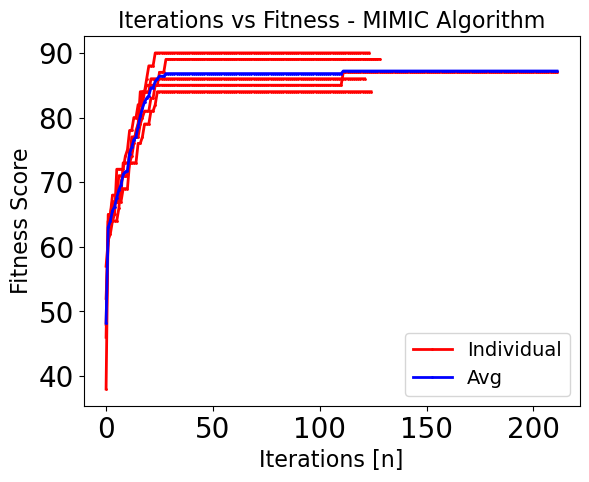

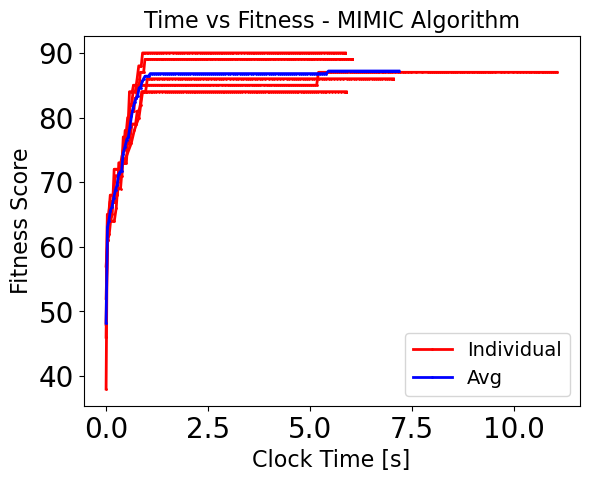

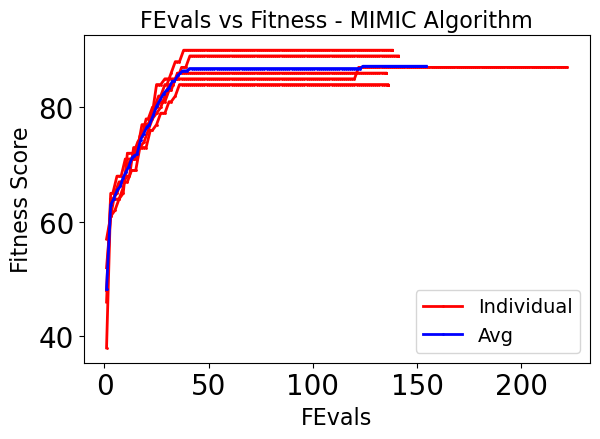

<Figure size 640x480 with 0 Axes>

In [19]:
best_curve_reduced_fitness_total_mmc = fitness_mean(best_curve_reduced_fitness_total_mmc)
best_curve_reduced_time_total_mmc = time_mean(best_curve_reduced_time_total_mmc)
best_curve_reduced_feval_total_mmc = feval_mean(best_curve_reduced_feval_total_mmc)

plot_fitness(best_curve_reduced_fitness_total_mmc,'MIMIC Algorithm')
plot_time(best_curve_reduced_time_total_mmc,'MIMIC Algorithm')
plot_fevals(best_curve_reduced_feval_total_mmc,'MIMIC Algorithm')

## Combined Plots

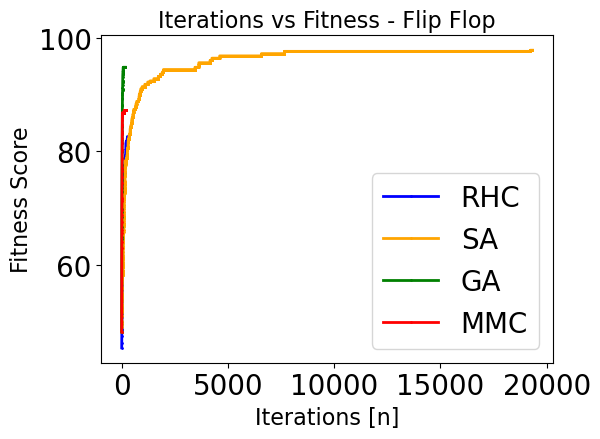

In [20]:
problem_name = 'Flip Flop'
# Fitness vs iterations
plt.plot(best_curve_reduced_fitness_total_rhc.Iterations, best_curve_reduced_fitness_total_rhc.Mean, lw=2, color='b', marker='.', markersize=2, label='RHC')
plt.plot(best_curve_reduced_fitness_total_sa.Iterations, best_curve_reduced_fitness_total_sa.Mean, lw=2, color='orange', marker='.', markersize=2, label='SA')
plt.plot(best_curve_reduced_fitness_total_ga.Iterations, best_curve_reduced_fitness_total_ga.Mean, lw=2, color='g', marker='.', markersize=2, label='GA')
plt.plot(best_curve_reduced_fitness_total_mmc.Iterations, best_curve_reduced_fitness_total_mmc.Mean, lw=2, color='r', marker='.', markersize=2, label='MMC')

plt.xlabel("Iterations [n]",fontsize = 16)
plt.ylabel("Fitness Score",fontsize = 16)
plt.title("Iterations vs Fitness - "+str(problem_name),fontsize = 16)
plt.legend(loc="best",prop={'size': 14})
plt.legend()
plt.tight_layout()
plt.show()

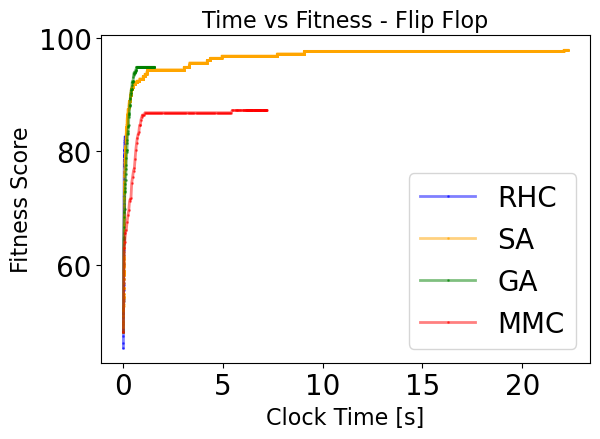

In [21]:
# Fitness vs Clock Time
plt.plot(best_curve_reduced_time_total_rhc.Mean_Time, best_curve_reduced_time_total_rhc.Mean, lw=2, color='b', marker='.', markersize=2, label='RHC',alpha =0.5)
plt.plot(best_curve_reduced_time_total_sa.Mean_Time, best_curve_reduced_time_total_sa.Mean, lw=2, color='orange', marker='.', markersize=2, label='SA',alpha =0.5)
plt.plot(best_curve_reduced_time_total_ga.Mean_Time, best_curve_reduced_time_total_ga.Mean, lw=2, color='g', marker='.', markersize=2, label='GA',alpha =0.5)
plt.plot(best_curve_reduced_time_total_mmc.Mean_Time, best_curve_reduced_time_total_mmc.Mean, lw=2, color='r', marker='.', markersize=2, label='MMC',alpha =0.5)

plt.xlabel("Clock Time [s]",fontsize = 16)
plt.ylabel("Fitness Score",fontsize = 16)
plt.title("Time vs Fitness - "+str(problem_name),fontsize = 16)
plt.legend(loc="best",prop={'size': 14})
plt.legend()
plt.tight_layout()
plt.show()

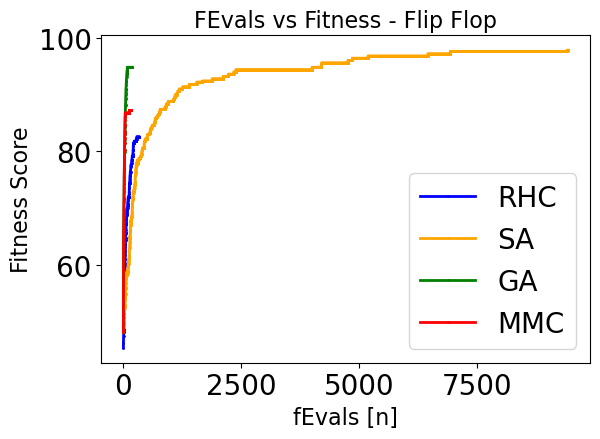

In [22]:
# Fitness vs FEval
plt.plot(best_curve_reduced_feval_total_rhc.Mean_Evals, best_curve_reduced_feval_total_rhc.Mean, lw=2, color='b', marker='.', markersize=2, label='RHC')
plt.plot(best_curve_reduced_feval_total_sa.Mean_Evals, best_curve_reduced_feval_total_sa.Mean, lw=2, color='orange', marker='.', markersize=2, label='SA')
plt.plot(best_curve_reduced_feval_total_ga.Mean_Evals, best_curve_reduced_feval_total_ga.Mean, lw=2, color='g', marker='.', markersize=2, label='GA')
plt.plot(best_curve_reduced_feval_total_mmc.Mean_Evals, best_curve_reduced_feval_total_mmc.Mean, lw=2, color='r', marker='.', markersize=2, label='MMC')

plt.xlabel("fEvals [n]",fontsize = 16)
plt.ylabel("Fitness Score",fontsize = 16)
plt.title("FEvals vs Fitness - "+str(problem_name),fontsize = 16)
plt.legend(loc="best",prop={'size': 14})
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
%%time
np.random.seed(42)
# Now we need to do over a different problem size. This will help to see the effects of increasing size on fitness scores
len_list = [50,100,150,200,250,300]
multiple_n_df_rhc_total = pd.DataFrame([])
multiple_n_df_sa_total = pd.DataFrame([])
multiple_n_df_ga_total = pd.DataFrame([])
multiple_n_df_mmc_total = pd.DataFrame([])

multiple_n_df_rhc_avg_total_total = pd.DataFrame([])
multiple_n_df_sa_avg_total_total = pd.DataFrame([])
multiple_n_df_ga_avg_total_total = pd.DataFrame([])
multiple_n_df_mmc_avg_total_total = pd.DataFrame([])

for i in len_list:
    print("Current length: "+str(i))
    problem = mlrose_hiive.FlipFlopOpt(length=i)
    # We need to run for 5 times and average the data
    multiple_n_df_rhc_avg_total=pd.DataFrame([])
    multiple_n_df_sa_avg_total = pd.DataFrame([])
    multiple_n_df_ga_avg_total = pd.DataFrame([])
    multiple_n_df_mmc_avg_total = pd.DataFrame([])
    
    for j in range(5):
        #
        rhc_runner = mlrose_hiive.RHCRunner(
            problem,
            experiment_name="RHC_Exp", 
            iteration_list=[100000],
            seed=(j+1)*j,
            max_attempts=100, 
            restart_list=[10],
            maximize =True
            )

        rhc_run_stats, rhc_run_curves = rhc_runner.run()

        best_index_in_curve = rhc_run_curves.Fitness.idxmax()
        best_value = rhc_run_curves.iloc[best_index_in_curve].current_restart
        best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_value, :]
        best_curve = best_curve.reset_index(drop=True)
        best_curve['FEvals'] = best_curve['FEvals']- (best_curve['FEvals'].loc[0]-1)
        
        
        data = [[i,best_curve.Fitness.max(),best_curve.Iteration.max(),best_curve.Time.max(),best_curve.FEvals.max()]]
        multiple_n_df_rhc_avg = pd.DataFrame(data, columns=['Size','Fitness','Iteration','Time','FEvals'])
        

        multiple_n_df_rhc_avg_total = pd.concat([multiple_n_df_rhc_avg,multiple_n_df_rhc_avg_total])
        multiple_n_df_rhc_avg_avg = multiple_n_df_rhc_avg_total.mean()
        multiple_n_df_rhc_avg_avg = multiple_n_df_rhc_avg_avg.to_frame().transpose()
        multiple_n_df_rhc_avg_avg = multiple_n_df_rhc_avg_avg.reset_index()
       
    # Round up # of iterations
    multiple_n_df_rhc_avg_avg['Iteration'] = int(multiple_n_df_rhc_avg_avg['Iteration'])
    multiple_n_df_rhc_avg_avg['FEvals'] = int(multiple_n_df_rhc_avg_avg['FEvals'])
    multiple_n_df_rhc_total = pd.concat([multiple_n_df_rhc_avg_avg,multiple_n_df_rhc_total])
    
    for j in range(5):    
        # For SA
        sa_runner = mlrose_hiive.SARunner(
        problem,
        experiment_name="SA_Exp", 
        iteration_list=[100000],
        seed=(j+i)*j,
        max_attempts=100, 
        temperature_list=[sa_init_temp],
        decay_list= [sa_schedule_list],
        maximize =True
        )

        sa_run_stats, sa_run_curves = sa_runner.run()
        best_curve = sa_run_curves.reset_index(drop=True)
        data = [[i, best_curve.Fitness.max(),best_curve.Iteration.max(),best_curve.Time.max(),best_curve.FEvals.max()]]
        multiple_n_df_sa = pd.DataFrame(data, columns=['Size', 'Fitness','Iteration','Time','FEvals'])
        
        multiple_n_df_sa_avg_total = pd.concat([multiple_n_df_sa,multiple_n_df_sa_avg_total])
        multiple_n_df_sa_avg_avg = multiple_n_df_sa_avg_total.mean()
        multiple_n_df_sa_avg_avg = multiple_n_df_sa_avg_avg.to_frame().transpose()
        multiple_n_df_sa_avg_avg = multiple_n_df_sa_avg_avg.reset_index()
        
    multiple_n_df_sa_avg_avg['Iteration'] = int(multiple_n_df_sa_avg_avg['Iteration'])
    multiple_n_df_sa_avg_avg['FEvals'] = int(multiple_n_df_sa_avg_avg['FEvals'])    
    multiple_n_df_sa_total = pd.concat([multiple_n_df_sa_avg_avg,multiple_n_df_sa_total])
    
    # For GA
    for j in range(5): 
        ga_runner = mlrose_hiive.GARunner(
        problem,
        experiment_name="GA_Exp", 
        iteration_list=[100000],
        seed=(j+1)*j,
        max_attempts=100, 
        population_sizes=[int(ga_population)],
        mutation_rates=[ga_mutation_rate],
        maximize =True
        )

        ga_run_stats, ga_run_curves = ga_runner.run()
        best_curve = ga_run_curves.reset_index(drop=True)
        data = [[i, best_curve.Fitness.max(),best_curve.Iteration.max(),best_curve.Time.max(),best_curve.FEvals.max()]]
        multiple_n_df_ga = pd.DataFrame(data, columns=['Size', 'Fitness','Iteration','Time','FEvals'])
        
        multiple_n_df_ga_avg_total = pd.concat([multiple_n_df_ga,multiple_n_df_ga_avg_total])
        multiple_n_df_ga_avg_avg = multiple_n_df_ga_avg_total.mean()
        multiple_n_df_ga_avg_avg = multiple_n_df_ga_avg_avg.to_frame().transpose()
        multiple_n_df_ga_avg_avg = multiple_n_df_ga_avg_avg.reset_index()
        
    multiple_n_df_ga_avg_avg['Iteration'] = int(multiple_n_df_ga_avg_avg['Iteration'])
    multiple_n_df_ga_avg_avg['FEvals'] = int(multiple_n_df_ga_avg_avg['FEvals'])    
    multiple_n_df_ga_total = pd.concat([multiple_n_df_ga_avg_avg,multiple_n_df_ga_total])

    #For Mimic
    for j in range(5): 
        mmc_runner = mlrose_hiive.MIMICRunner(
        problem,
        experiment_name="MMC_Exp", 
        iteration_list=[100000],
        seed=(j+1)*j,
        max_attempts=100, 
        population_sizes=[int(mmc_pop_size)],
        keep_percent_list=[mmc_keep_percent],
        maximize =True,
        use_fast_mimic=True
        )

        mmc_run_stats, mmc_run_curves = mmc_runner.run()
        best_curve = mmc_run_curves.reset_index(drop=True)
        data = [[i, best_curve.Fitness.max(),best_curve.Iteration.max(),best_curve.Time.max(),best_curve.FEvals.max()]]
        multiple_n_df_mmc = pd.DataFrame(data, columns=['Size', 'Fitness','Iteration','Time','FEvals'])
        
        multiple_n_df_mmc_avg_total = pd.concat([multiple_n_df_mmc,multiple_n_df_mmc_avg_total])
        multiple_n_df_mmc_avg_avg = multiple_n_df_mmc_avg_total.mean()
        multiple_n_df_mmc_avg_avg = multiple_n_df_mmc_avg_avg.to_frame().transpose()
        multiple_n_df_mmc_avg_avg = multiple_n_df_mmc_avg_avg.reset_index()
        
    multiple_n_df_mmc_avg_avg['Iteration'] = int(multiple_n_df_mmc_avg_avg['Iteration'])
    multiple_n_df_mmc_avg_avg['FEvals'] = int(multiple_n_df_mmc_avg_avg['FEvals']) 
    multiple_n_df_mmc_total = pd.concat([multiple_n_df_mmc,multiple_n_df_mmc_total])

Current length: 50
Current length: 100
Current length: 150
Current length: 200
Current length: 250
Current length: 300
Wall time: 40min


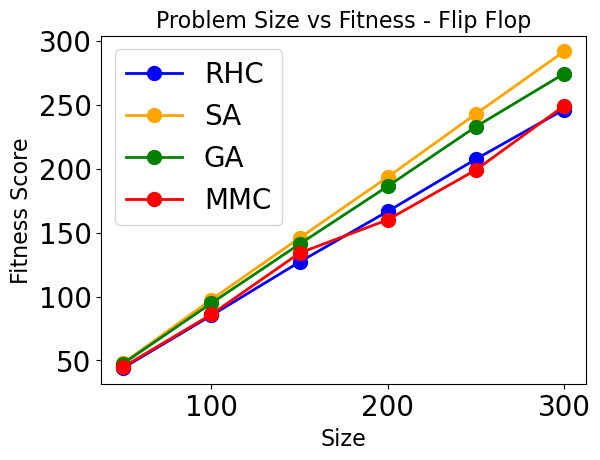

In [24]:
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_rhc_total.Fitness, lw=2, color='b',marker='o', markersize=10, label ='RHC')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_sa_total.Fitness, lw=2, color='orange', marker='o',markersize=10, label ='SA')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_ga_total.Fitness, lw=2, color='g', marker='o', markersize=10, label ='GA')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_mmc_total.Fitness, lw=2, color='r', marker='o', markersize=10, label ='MMC')

plt.xlabel("Size",fontsize = 16)
plt.ylabel("Fitness Score",fontsize = 16)
plt.legend(loc="best",prop={'size': 14})
plt.legend()
plt.tight_layout()
plt.title('Problem Size vs Fitness - '+str(problem_name),fontsize = 16)
plt.show()

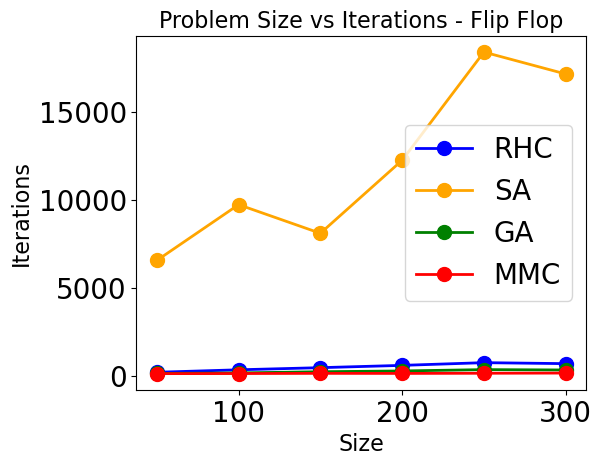

In [25]:

plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_rhc_total.Iteration, lw=2, color='b',marker='o', markersize=10, label ='RHC')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_sa_total.Iteration, lw=2, color='orange', marker='o',markersize=10, label ='SA')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_ga_total.Iteration, lw=2, color='g', marker='o', markersize=10, label ='GA')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_mmc_total.Iteration, lw=2, color='r', marker='o', markersize=10, label ='MMC')

plt.xlabel("Size",fontsize = 16)
plt.ylabel("Iterations",fontsize = 16)
plt.legend(loc="best",prop={'size': 14})
plt.legend()
plt.tight_layout()
plt.title('Problem Size vs Iterations - '+str(problem_name),fontsize = 16)
plt.show()

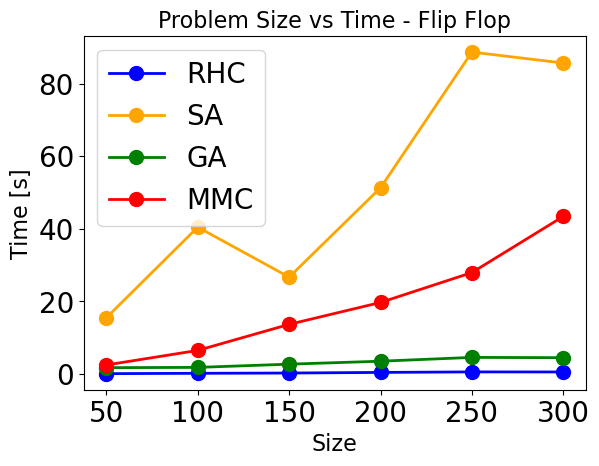

In [26]:
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_rhc_total.Time, lw=2, color='b',marker='o', markersize=10, label ='RHC')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_sa_total.Time, lw=2, color='orange', marker='o',markersize=10, label ='SA')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_ga_total.Time, lw=2, color='g', marker='o', markersize=10, label ='GA')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_mmc_total.Time, lw=2, color='r', marker='o', markersize=10, label ='MMC')

plt.xlabel("Size",fontsize = 16)
plt.ylabel("Time [s]",fontsize = 16)
plt.legend(loc="best",prop={'size': 14})
plt.legend()
plt.tight_layout()
plt.title('Problem Size vs Time - '+str(problem_name),fontsize = 16)
plt.show()

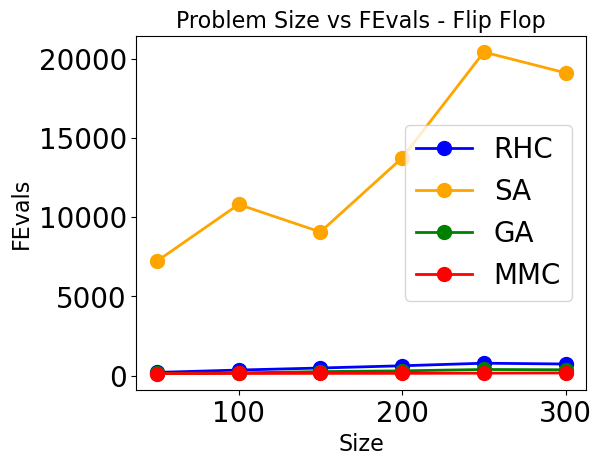

In [27]:
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_rhc_total.FEvals, lw=2, color='b',marker='o', markersize=10, label ='RHC')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_sa_total.FEvals, lw=2, color='orange', marker='o',markersize=10, label ='SA')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_ga_total.FEvals, lw=2, color='g', marker='o', markersize=10, label ='GA')
plt.plot(multiple_n_df_rhc_total.Size, multiple_n_df_mmc_total.FEvals, lw=2, color='r', marker='o', markersize=10, label ='MMC')

plt.xlabel("Size",fontsize = 16)
plt.ylabel("FEvals",fontsize = 16)
plt.legend(loc="best",prop={'size': 14})
plt.legend()
plt.tight_layout()
plt.title('Problem Size vs FEvals - '+str(problem_name),fontsize = 16)
plt.show()